In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import jieba.posseg as psg

# 文本预处理

## 评论去重

In [2]:
# 加载评论数据
reviews = pd.read_csv('data/reviews.csv')
reviews

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
...,...,...,...,...,...
1995,差评，差的一塌糊涂，千万别买，上当了，,2016-11-25 14:57:52,沫沫19900404,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg
1996,热水器还没有安装，就搞一肚子气，安装人员今天推明天，明天推后天，售后安装服务太差，给差评，目...,2016-11-25 13:39:28,j***l,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg
1997,好不容易网购一下还漏电,2016-11-25 13:38:49,K***T,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg
1998,东西送的挺快，后期报装2天还没人联系我，售后太差,2016-11-25 10:19:20,j***p,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),neg


In [3]:
# 统计重复数据
reviews[['content', 'content_type']].duplicated().sum()

26

In [4]:
# 评论去重
reviews = reviews[['content', 'content_type']].drop_duplicates()
reviews

,content,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,pos
1,安装师傅很给力，热水器也好用，感谢美的。,pos
2,还没安装，基本满意,pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,pos
...,...,...
1995,差评，差的一塌糊涂，千万别买，上当了，,neg
1996,热水器还没有安装，就搞一肚子气，安装人员今天推明天，明天推后天，售后安装服务太差，给差评，目...,neg
1997,好不容易网购一下还漏电,neg
1998,东西送的挺快，后期报装2天还没人联系我，售后太差,neg


In [5]:
reviews.reset_index(drop=True,inplace=True)

## 数据清洗

In [6]:
# 去掉评论中的数字、字母，以及“京东”“京东商城”“美的”“热水器”“电热水器"
content = reviews['content']
# 编译匹配模式
pattern = re.compile('[a-zA-Z0-9]|京东|美的|电热水器|热水器|京东商城')
# re.sub用于替换字符串中的匹配项
content = content.apply(lambda x : pattern.sub('',x))

In [7]:
content

0       东西收到这么久，都忘了去好评，大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什么问...
1                                         安装师傅很给力，也好用，感谢。
2                                               还没安装，基本满意
3       收到了，自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可以小时有热水...
4       用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...
                              ...                        
1969                                  差评，差的一塌糊涂，千万别买，上当了，
1970    还没有安装，就搞一肚子气，安装人员今天推明天，明天推后天，售后安装服务太差，给差评，目前还在...
1971                                          好不容易网购一下还漏电
1972                              东西送的挺快，后期报装天还没人联系我，售后太差
1973                                 买了两个，送到一个，还有一个至今未送到。
Name: content, Length: 1974, dtype: object

## 评论分词

### 分词、词性标注、去除停用词

In [8]:
# 自定义简单的分词函数
worker = lambda s : [[x.word,x.flag] for x in psg.cut(s)]   # 单词与词性
seg_word = content.apply(worker)
seg_word

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.629 seconds.
Prefix dict has been built successfully.


0       [[东西, ns], [收到, v], [这么久, r], [，, x], [都, d], ...
1       [[安装, v], [师傅, nr], [很, d], [给, p], [力, n], [，...
2       [[还, d], [没, v], [安装, v], [，, x], [基本, n], [满意...
3       [[收到, v], [了, ul], [，, x], [自营, vn], [商品, n], ...
4       [[用, p], [了, ul], [几次, m], [才, d], [来, v], [评价...
                              ...                        
1969    [[差, a], [评, n], [，, x], [差, a], [的, uj], [一塌糊...
1970    [[还, d], [没有, v], [安装, v], [，, x], [就, d], [搞,...
1971      [[好不容易, l], [网购, n], [一下, m], [还, d], [漏电, nz]]
1972    [[东西, ns], [送, v], [的, uj], [挺快, v], [，, x], [...
1973    [[买, v], [了, ul], [两个, m], [，, x], [送到, v], [一...
Name: content, Length: 1974, dtype: object

In [9]:
# 将词语转化为数据框形式，一列是词，一列是词语所在的句子id，最后一列是词语在该句子中的位置
 # 每一评论中词的个数
n_word = seg_word.apply(lambda x: len(x)) 
# 构造词语所在的句子id
n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]
# 将嵌套的列表展开，作为词所在评论的id
index_content = sum(n_content, [])    # []指定相加的参数

In [10]:
seg_word = sum(seg_word,[])
# 词
word = [x[0] for x in seg_word]
# 词性
nature = [x[1] for x in seg_word]

In [11]:
# content_type评论类型
content_type = [[x]*y for x,y in zip(list(reviews['content_type']),list(n_word))]
content_type = sum(content_type,[])

In [12]:
# 构造数据框
result = pd.DataFrame({'index_content': index_content,
                      'word' : word,
                      'nature': nature,
                      'content_type' : content_type})
result

,index_content,word,nature,content_type
0,1,东西,ns,pos
1,1,收到,v,pos
2,1,这么久,r,pos
3,1,，,x,pos
4,1,都,d,pos
...,...,...,...,...
63789,1974,一个,m,neg
63790,1974,至今,d,neg
63791,1974,未,d,neg
63792,1974,送到,v,neg


In [13]:
# 删除标点符号
result = result[result['nature'] != 'x']
result

,index_content,word,nature,content_type
0,1,东西,ns,pos
1,1,收到,v,pos
2,1,这么久,r,pos
4,1,都,d,pos
5,1,忘,v,pos
...,...,...,...,...
63788,1974,还有,v,neg
63789,1974,一个,m,neg
63790,1974,至今,d,neg
63791,1974,未,d,neg


In [14]:
# 删除停用词
# 加载停用词
stop_path = open('data/stoplist.txt','r',encoding='utf-8')
stop = [x.replace('\n','') for x in stop_path.readlines()]
# 得到非停用词序列
word = list(set(word) - set(stop))
# 判断表格中的单词列是否在非停用词列中
result = result[result['word'].isin(word)]
result

,index_content,word,nature,content_type
0,1,东西,ns,pos
1,1,收到,v,pos
2,1,这么久,r,pos
5,1,忘,v,pos
8,1,好评,v,pos
...,...,...,...,...
63780,1973,差,a,neg
63783,1974,两个,m,neg
63785,1974,送到,v,neg
63791,1974,未,d,neg


In [15]:
# 构造各词在评论中的位置列
n_word = list(result.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = sum(index_word,[])
result['index_word'] = index_word
result.reset_index(drop=True,inplace=True)
result

d:\softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,0
1,1,收到,v,pos,1
2,1,这么久,r,pos,2
3,1,忘,v,pos,3
4,1,好评,v,pos,4
...,...,...,...,...,...
25167,1973,差,a,neg,9
25168,1974,两个,m,neg,0
25169,1974,送到,v,neg,1
25170,1974,未,d,neg,2


### 提取含名词的评论

In [16]:
# 提取含名词的评论的句子id
ind = result[[x == 'n' for x in result['nature']]]['index_content'].unique()
# 提取评论
result = result[result['index_content'].isin(ind)]
# 重置索引
result.reset_index(drop=True,inplace=True)
result

,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,0
1,1,收到,v,pos,1
2,1,这么久,r,pos,2
3,1,忘,v,pos,3
4,1,好评,v,pos,4
...,...,...,...,...,...
24276,1973,天,q,neg,5
24277,1973,没人,v,neg,6
24278,1973,售后,n,neg,7
24279,1973,太,d,neg,8


### 绘制图云查看分词效果

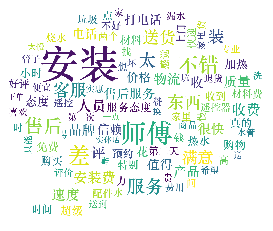

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 按word分组统计数目
frequencies = result.groupby(by = ['word'])['word'].count()
# 按数目降序排序
frequencies = frequencies.sort_values(ascending = False)
# 从文件中将图像读取为数组
backgroud_Image=plt.imread('data/pl.jpg')
wordcloud = WordCloud(font_path="C:\Windows\Fonts\STZHONGS.ttf",# 字体
                      max_words=100,            # 选择前100词
                      background_color='white',  # 背景颜色为白色
                      mask=backgroud_Image)
my_wordcloud = wordcloud.fit_words(frequencies)
# 将数据展示到二维图像上
plt.imshow(my_wordcloud)
# 关掉x,y轴
plt.axis('off') 
plt.show()

# 将结果写出
result.to_csv("word.csv", index = False, encoding = 'utf-8')

# 构建模型

## 评论数据情感倾向分析

### 1.匹配情感词

In [18]:
# 读入正负面评论情感词表
word = pd.read_csv('word.csv',header=0)
# 读入正面、负面情感评价词
pos_comment = pd.read_csv("data/正面评价词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
neg_comment = pd.read_csv("data/负面评价词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
pos_emotion = pd.read_csv("data/正面情感词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
neg_emotion = pd.read_csv("data/负面情感词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')

# 合并情感词与评价词
positive = set(pos_comment.iloc[:,0])|set(pos_emotion.iloc[:,0])
negative = set(neg_comment.iloc[:,0])|set(neg_emotion.iloc[:,0])
# 正负面情感词表中相同的词语
intersection = positive & negative  
# 去掉相同的词
positive = list(positive - intersection)
negative = list(negative - intersection)

# 正面词语赋予初始权重1，负面词语赋予初始权重-1
positive = pd.DataFrame({"word":positive,
                         "weight":[1]*len(positive)})
negative = pd.DataFrame({"word":negative,
                         "weight":[-1]*len(negative)})
posneg = positive.append(negative)
# 将分词结果与正负面情感词表合并，定位情感词
data_posneg = pd.merge(left=word,right=posneg,on='word',how='left')
# 先按评论id排序，再按在评论中的位置排序
data_posneg = data_posneg.sort_values(by = ['index_content','index_word'])
data_posneg

,index_content,word,nature,content_type,index_word,weight
0,1,东西,ns,pos,0,NaN
1,1,收到,v,pos,1,NaN
2,1,这么久,r,pos,2,NaN
3,1,忘,v,pos,3,NaN
4,1,好评,v,pos,4,1.0
...,...,...,...,...,...,...
24276,1973,天,q,neg,5,NaN
24277,1973,没人,v,neg,6,NaN
24278,1973,售后,n,neg,7,NaN
24279,1973,太,d,neg,8,NaN


### 2.修正情感倾向

In [19]:
# 根据情感词前面两个位置的词语是否存在否定词或双层否定词对情感值进行修正
# 载入否定词表
notdict = pd.read_csv("data/not.csv")
# 处理否定修饰词
# 构造新列，作为经过否定词修正后的情感值
data_posneg['amend_weight'] = data_posneg['weight'] 
data_posneg['id'] = np.arange(0, len(data_posneg))
# 只保留有情感值的词语
only_inclination = data_posneg.dropna()  
# 修改索引
only_inclination.index = np.arange(0, len(only_inclination))
only_inclination

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,1,好评,v,pos,4,1.0,1.0,4
1,1,值得,v,pos,6,1.0,1.0,6
2,1,信赖,n,pos,7,1.0,1.0,7
3,1,值得,v,pos,12,1.0,1.0,12
4,2,感谢,v,pos,3,1.0,1.0,17
...,...,...,...,...,...,...,...,...
1418,1962,贵,a,neg,7,-1.0,-1.0,24165
1419,1968,高,a,neg,3,-1.0,-1.0,24235
1420,1971,差评,n,neg,15,-1.0,-1.0,24263
1421,1972,漏电,nz,neg,2,-1.0,-1.0,24270


In [20]:
index = only_inclination['id']
for i in np.arange(0, len(only_inclination)):
    # 提取第i个情感词所在的评论
    review = data_posneg[data_posneg['index_content'] == only_inclination['index_content'][i]]  
    # 修改索引
    review.index = np.arange(0, len(review))
    # 第i个情感值在该文档的位置
    affective = only_inclination['index_word'][i]  
    if affective == 1:
        # 情感词前面的单词是否在否定词表
        ne = sum([i in notdict['term'] for i in review['word'][affective - 1]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]          
    elif affective > 1:
        # 情感词前面两个位置的词语是否在否定词，存在一个调整成相反的情感权重，存在两个就不调整
        ne = sum([i in notdict['term'] for i in review['word'][[affective - 1, affective - 2]]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]

In [21]:
only_inclination

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,1,好评,v,pos,4,1.0,1.0,4
1,1,值得,v,pos,6,1.0,1.0,6
2,1,信赖,n,pos,7,1.0,1.0,7
3,1,值得,v,pos,12,1.0,1.0,12
4,2,感谢,v,pos,3,1.0,1.0,17
...,...,...,...,...,...,...,...,...
1418,1962,贵,a,neg,7,-1.0,-1.0,24165
1419,1968,高,a,neg,3,-1.0,-1.0,24235
1420,1971,差评,n,neg,15,-1.0,-1.0,24263
1421,1972,漏电,nz,neg,2,-1.0,-1.0,24270


In [22]:
only_inclination.isnull().sum()

index_content    0
word             0
nature           0
content_type     0
index_word       0
weight           0
amend_weight     0
id               0
dtype: int64

In [23]:
# 计算每条评论的情感值
emotional_value = only_inclination.groupby(['index_content'],as_index=False)['amend_weight'].sum()
# 去除情感值为0的评论
emotional_value = emotional_value[emotional_value['amend_weight'] != 0]
emotional_value.reset_index(drop=True,inplace=True)
emotional_value

,index_content,amend_weight
0,1,4.0
1,2,1.0
2,4,4.0
3,5,1.0
4,6,1.0
...,...,...
868,1962,-1.0
869,1968,-1.0
870,1971,-1.0
871,1972,-1.0


### 查看情感分析效果

In [24]:
# 给情感值大于0的赋予评论类型pos，小于0的赋予neg
emotional_value['a_type'] = ''
emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'
# 查看情感分析的结果
result = pd.merge(left=word,right=emotional_value,on='index_content',how='right')
result

d:\softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\softwares\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index_content,word,nature,content_type,index_word,amend_weight,a_type
0,1,东西,ns,pos,0,4.0,pos
1,1,收到,v,pos,1,4.0,pos
2,1,这么久,r,pos,2,4.0,pos
3,1,忘,v,pos,3,4.0,pos
4,1,好评,v,pos,4,4.0,pos
...,...,...,...,...,...,...,...
13970,1973,天,q,neg,5,1.0,pos
13971,1973,没人,v,neg,6,1.0,pos
13972,1973,售后,n,neg,7,1.0,pos
13973,1973,太,d,neg,8,1.0,pos


In [25]:
# 去重
result = result[['index_content','content_type', 'a_type']].drop_duplicates() 
result

,index_content,content_type,a_type
0,1,pos,pos
14,2,pos,pos
18,4,pos,pos
38,5,pos,pos
61,6,pos,pos
...,...,...,...
13928,1962,neg,neg
13937,1968,neg,neg
13942,1971,neg,neg
13962,1972,neg,neg


In [26]:
confusion_matrix = pd.crosstab(result['content_type'],result['a_type'],margins=True)
confusion_matrix

a_type,neg,pos,All
content_type,,,
neg,361,54,415
pos,39,419,458
All,400,473,873


In [27]:
# 准确率
(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1])/confusion_matrix.iloc[2,2]

0.8934707903780069

In [28]:
# 提取正负面评论信息
# 得到正面评论与负面评论对应的索引
ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
# 得到正面评论与负面评论
posdata = word[[i in ind_pos for i in word['index_content']]]
negdata = word[[i in ind_neg for i in word['index_content']]]

,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,0
1,1,收到,v,pos,1
2,1,这么久,r,pos,2
3,1,忘,v,pos,3
4,1,好评,v,pos,4
...,...,...,...,...,...
24276,1973,天,q,neg,5
24277,1973,没人,v,neg,6
24278,1973,售后,n,neg,7
24279,1973,太,d,neg,8


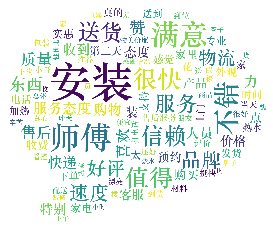

In [30]:
# 绘制正面情感词云
# 正面情感词词云
freq_pos = posdata.groupby(by = ['word'])['word'].count()
freq_pos = freq_pos.sort_values(ascending = False)
backgroud_Image=plt.imread('data/pl.jpg')
wordcloud = WordCloud(font_path="C:/Windows/Fonts/STZHONGS.ttf",
                      max_words=100,
                      background_color='white',
                      mask=backgroud_Image)
pos_wordcloud = wordcloud.fit_words(freq_pos)
plt.imshow(pos_wordcloud)
plt.axis('off') 
plt.show()

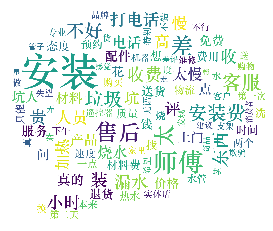

In [31]:
# 绘制负面评论词云
freq_neg = negdata.groupby(by = ['word'])['word'].count()
freq_neg = freq_neg.sort_values(ascending = False)
neg_wordcloud = wordcloud.fit_words(freq_neg)
plt.imshow(neg_wordcloud)
plt.axis('off') 
plt.show()

In [32]:
# 将结果写出,每条评论作为一行
posdata.to_csv("posdata.csv", index = False, encoding = 'utf-8')
negdata.to_csv("negdata.csv", index = False, encoding = 'utf-8')

## LDA主题模型

### 1.建立词典与语料库

In [35]:
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt

# 载入情感分析后的数据
posdata = pd.read_csv("posdata.csv", encoding = 'utf-8')
negdata = pd.read_csv("negdata.csv", encoding = 'utf-8')

from gensim import corpora, models
# 建立词典
pos_dict = corpora.Dictionary([[i] for i in posdata['word']])  # 正面
neg_dict = corpora.Dictionary([[i] for i in negdata['word']])  # 负面

# 建立语料库
pos_corpus = [pos_dict.doc2bow(j) for j in [[i] for i in posdata['word']]]  # 正面
neg_corpus = [neg_dict.doc2bow(j) for j in [[i] for i in negdata['word']]]   # 负面

d:\softwares\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [36]:
def cos(vector1, vector2):
    """
    计算两个向量的余弦相似度函数
    :param vector1:
    :param vector2:
    :return: 返回两个向量的余弦相似度
    """
    dot_product = 0.0
    normA = 0.0
    normB = 0.0
    for a, b in zip(vector1, vector2):
        dot_product += a * b
        normA += a ** 2
        normB += b ** 2
    if normA == 0.0 or normB == 0.0:
        return (None)
    else:
        return (dot_product / ((normA * normB) ** 0.5))



def lda_k(x_corpus, x_dict):
    """
    主题数寻优
    :param x_corpus: 语料库
    :param x_dict: 词典
    :return:
    """
    # 初始化平均余弦相似度
    mean_similarity = []
    mean_similarity.append(1)

    # 循环生成主题并计算主题间相似度
    for i in np.arange(2, 11):
        lda = models.LdaModel(x_corpus, num_topics=i, id2word=x_dict)  # LDA模型训练
        for j in np.arange(i):
            term = lda.show_topics(num_words=50)

        # 提取各主题词
        top_word = []
        for k in np.arange(i):
            top_word.append([''.join(re.findall('"(.*)"', i)) for i in term[k][1].split('+')])  # 列出所有词

        # 构造词频向量
        word = sum(top_word, [])  # 列出所有的词
        unique_word = set(word)  # 去除重复的词

        # 构造主题词列表，行表示主题号，列表示各主题词
        mat = []
        for j in np.arange(i):
            top_w = top_word[j]
            mat.append(tuple([top_w.count(k) for k in unique_word]))

        p = list(itertools.permutations(list(np.arange(i)), 2))
        l = len(p)
        top_similarity = [0]
        for w in np.arange(l):
            vector1 = mat[p[w][0]]
            vector2 = mat[p[w][1]]
            top_similarity.append(cos(vector1, vector2))

        # 计算平均余弦相似度
        mean_similarity.append(sum(top_similarity) / l)
    return (mean_similarity)

正面评论主题的平均相似度 [1, 0.06, 0.0, 0.013333333333333334, 0.024, 0.013333333333333334, 0.013333333333333334, 0.02642857142857144, 0.03888888888888891, 0.0631111111111111]
负面评论主题的平均相似度 [1, 0.06, 0.0, 0.0033333333333333335, 0.0, 0.0, 0.0038095238095238095, 0.011428571428571432, 0.012777777777777784, 0.021777777777777788]


Text(0.5, 0, '负面评论LDA主题数寻优')

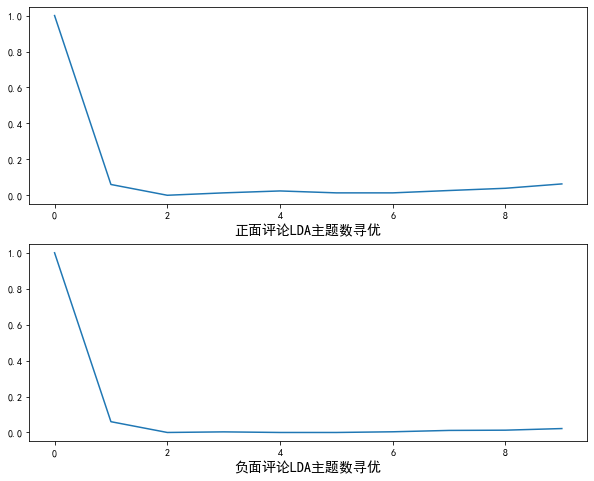

In [39]:
# 计算主题平均余弦相似度
pos_k = lda_k(pos_corpus, pos_dict)
neg_k = lda_k(neg_corpus, neg_dict)        
print('正面评论主题的平均相似度',pos_k)
print('负面评论主题的平均相似度',neg_k)

# 绘制主题平均余弦相似度图形
# 解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False  
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.plot(pos_k)
ax1.set_xlabel('正面评论LDA主题数寻优',fontsize=14)

ax2 = fig.add_subplot(212)
ax2.plot(neg_k)
ax2.set_xlabel('负面评论LDA主题数寻优', fontsize=14)


### 3.LDA主题分析

In [42]:
pos_lda = models.LdaModel(pos_corpus, num_topics = 3, id2word = pos_dict)  
neg_lda = models.LdaModel(neg_corpus, num_topics = 3, id2word = neg_dict)  
pos_lda.print_topics(num_words = 10)


[(0,
  '0.028*"送货" + 0.024*"服务" + 0.020*"好评" + 0.016*"太" + 0.012*"速度" + 0.011*"告诉" + 0.011*"质量" + 0.011*"活动" + 0.010*"收到" + 0.010*"服务态度"'),
 (1,
  '0.128*"安装" + 0.060*"满意" + 0.045*"师傅" + 0.027*"客服" + 0.026*"不错" + 0.016*"购物" + 0.016*"人员" + 0.011*"真心" + 0.011*"态度" + 0.010*"装"'),
 (2,
  '0.029*"值得" + 0.028*"很快" + 0.023*"东西" + 0.022*"售后" + 0.021*"差" + 0.020*"信赖" + 0.016*"电话" + 0.016*"物流" + 0.015*"真的" + 0.014*"品牌"')]

In [41]:
neg_lda.print_topics(num_words = 10)

[(0,
  '0.032*"垃圾" + 0.031*"售后" + 0.030*"太" + 0.025*"安装费" + 0.022*"东西" + 0.019*"装" + 0.019*"小时" + 0.018*"收" + 0.018*"打电话" + 0.016*"烧水"'),
 (1,
  '0.142*"安装" + 0.034*"师傅" + 0.021*"客服" + 0.019*"收费" + 0.019*"不好" + 0.018*"贵" + 0.017*"慢" + 0.017*"太慢" + 0.014*"人员" + 0.012*"坑"'),
 (2,
  '0.026*"差" + 0.016*"加热" + 0.014*"漏水" + 0.011*"材料" + 0.009*"材料费" + 0.008*"只能" + 0.007*"做" + 0.007*"找" + 0.006*"实体店" + 0.006*"度"')]